# seaborn titanic

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
type(titanic)

pandas.core.frame.DataFrame

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:xlabel='age', ylabel='parch'>

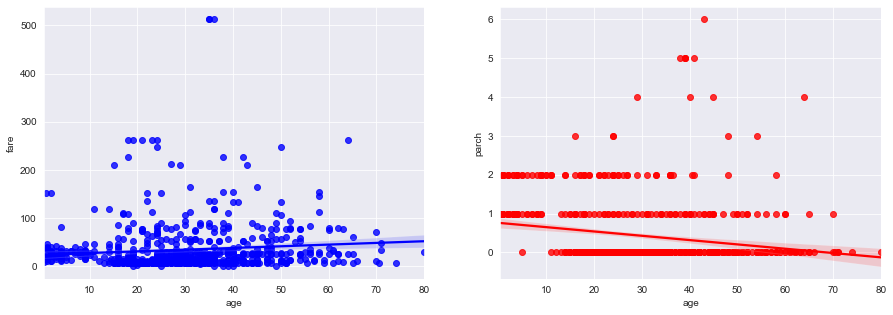

In [12]:
# 스타일 테마 설정 - darkgrid, whitegrid, dark, white, ticks
sns.set_style('darkgrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 그래프 그리기 - 선형회귀선 표시
sns.regplot(x = 'age',
           y = 'fare',
           data = titanic,
           ax = ax1,
           color = 'blue',
           fit_reg = True)

sns.regplot(x = 'age',
           y = 'parch',
           data = titanic,
           ax = ax2,
           color = 'red',
           fit_reg = True)

C:\Users\dojun\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dojun\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dojun\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

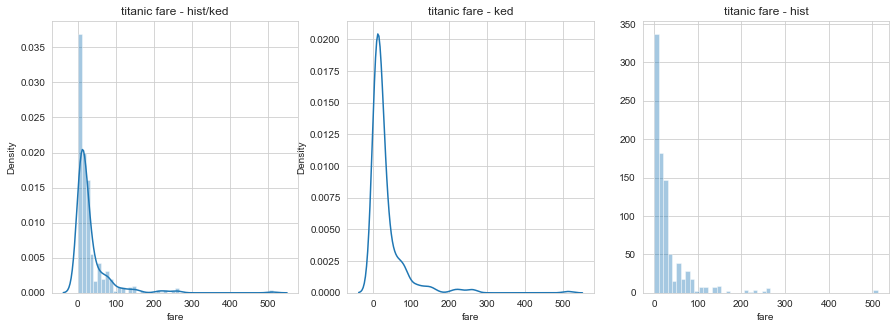

In [24]:
# 스타일 테마 설정 - darkgrid, whitegrid, dark, white, ticks
sns.set_style('whitegrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값
sns.distplot(titanic['fare'], ax = ax1)

# 커널 밀도 그래프만 출력
sns.distplot(titanic['fare'], hist=False, ax = ax2)

# 커널 밀도 그래프만 출력
sns.distplot(titanic['fare'], kde=False, ax = ax3)

ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

In [28]:
# 피벗 테이블
table = titanic.pivot_table(index = ['sex'], columns = ['class'], aggfunc = 'size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


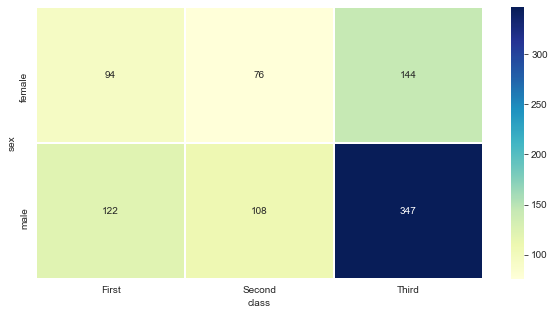

In [36]:
# 히트맵 그리기
plt.figure(figsize = (10, 5))
sns.heatmap(table,
           annot = True,
           fmt = '.0f',
           cmap = 'YlGnBu',
           linewidth = .5,
           cbar = True)

plt.show()

C:\Users\dojun\anaconda3\envs\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


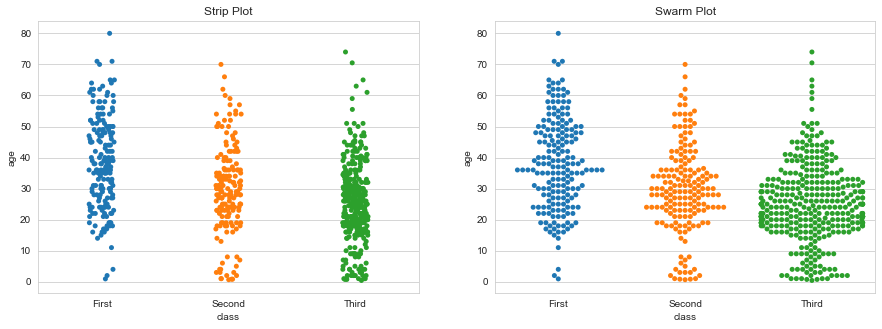

In [39]:
# 범주형 데이터 산점도
sns.set_style('whitegrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수 분포
sns.stripplot(x = 'class',
             y = 'age',
             data = titanic,
             ax = ax1)

sns.swarmplot(x = 'class',
             y = 'age',
             data = titanic,
             ax = ax2)

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

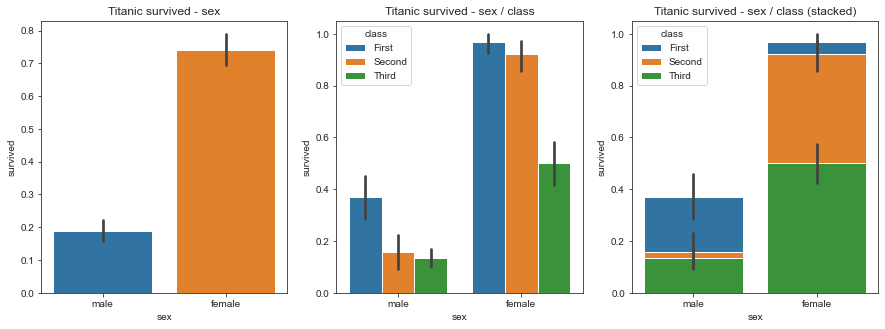

In [41]:
# 막대그래프
sns.set_style('ticks')

# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# x축, y축 값 지정
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic, ax = ax2)  # hue 옵션 추가
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False, data = titanic, ax = ax3)  # 누적 출력

# 차트 제목 표시
ax1.set_title('Titanic survived - sex')
ax2.set_title('Titanic survived - sex / class')
ax3.set_title('Titanic survived - sex / class (stacked)')

plt.show()

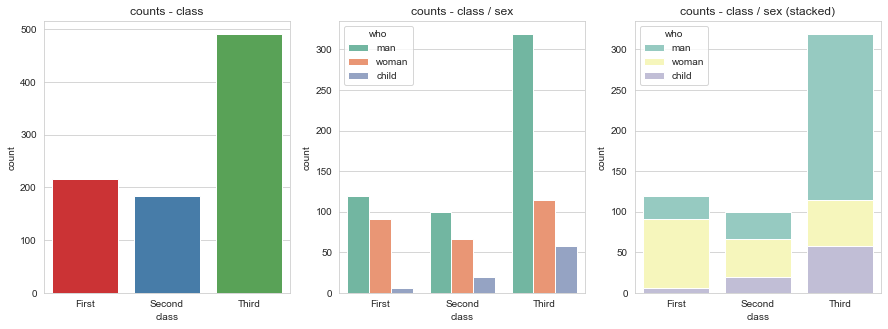

In [44]:
# 빈도 그래프
sns.set_style('whitegrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# x축, y축 값 지정
sns.countplot(x = 'class', palette = 'Set1', data = titanic, ax = ax1)
sns.countplot(x = 'class', hue = 'who', palette = 'Set2', data = titanic, ax = ax2)  # hue 옵션 추가
sns.countplot(x = 'class', hue = 'who', palette = 'Set3', dodge = False, data = titanic, ax = ax3)  # 누적 출력

# 차트 제목 표시
ax1.set_title('counts - class')
ax2.set_title('counts - class / sex')
ax3.set_title('counts - class / sex (stacked)')

plt.show()

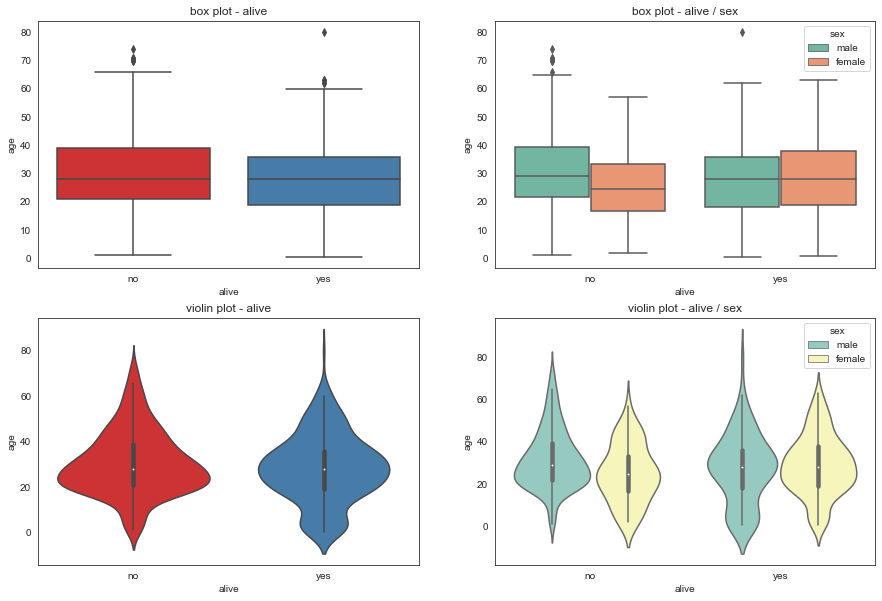

In [58]:
# 박스 / 바이올린 플롯
sns.set_style('white')

# 그래프 객체 생성
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# box plot
sns.boxplot(x = 'alive', y = 'age', palette = 'Set1', data = titanic, ax = ax1)
sns.boxplot(x = 'alive', y = 'age', hue = 'sex', palette = 'Set2', data = titanic, ax = ax2)  # hue 옵션 추가

# violin plot
sns.violinplot(x = 'alive', y = 'age', palette = 'Set1', data = titanic, ax = ax3)  # 누적 출력
sns.violinplot(x = 'alive', y = 'age', hue = 'sex', palette = 'Set3', data = titanic, ax = ax4)  # 누적 출력

# 차트 제목 표시
ax1.set_title('box plot - alive')
ax2.set_title('box plot - alive / sex')
ax3.set_title('violin plot - alive')
ax4.set_title('violin plot - alive / sex')

plt.show()

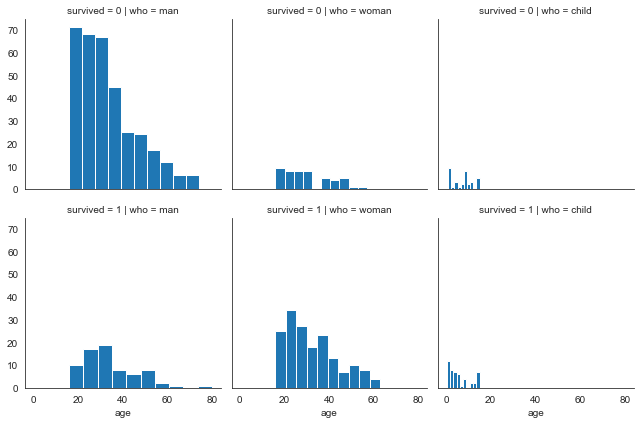

In [60]:
g = sns.FacetGrid(data = titanic, col = 'who', row = 'survived')
g.map(plt.hist, 'age')
plt.show()

In [ ]:
g = sns.FacetGrid(data = titanic, col = 'who', row = 'survived')
g.map(plt.hist, 'age')
plt.show()

# folium

In [66]:
import folium

seoul_map = folium.Map(location = [37.5536520242341, 126.98802064912861], zoom_start = 12)
seoul_map

In [73]:
import pandas as pd
import folium

df = pd.read_excel('./py_data/data/서울지역 대학교 위치.xls')

seoul_map = folium.Map(location = [37.5536520242341, 126.98802064912861], 
                       tiles = 'Stamen Terrain',
                       zoom_start = 11)

for i, r in df.iterrows():
    name = r[0]
    lat = r[1]
    lon = r[2]
    folium.Marker(location = [lat, lon], 
                  icon=folium.Icon(color='blue'),
                  popup = name).add_to(seoul_map)

seoul_map

In [108]:
seoul_map.save('./py_data/data/서울지역 대학교 위치.html')

# 경기도 경계
대한민국 최신 행정구역(SHP) 다운로드
- 원본: http://www.gisdeveloper.co.kr/?p=2332
- json: https://neurowhai.tistory.com/350
- folium 참고: https://dailyheumsi.tistory.com/m/144?category=854906

In [79]:
df = pd.read_excel('./py_data/data/경기도인구데이터.xls', index_col = '구분')
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [80]:
df.columns

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')

In [82]:
for i in range(len(df.columns)):
    df = df.rename(columns = {df.columns[i] : str(df.columns[i])})

In [83]:
df.columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [84]:
import json

geo_data = json.load(open('./py_data/data/경기도행정구역경계.json', encoding = 'utf-8'))

In [87]:
geo_data.keys()

dict_keys(['type', 'features'])

In [ ]:
geo_data['features']

In [95]:
len(geo_data['features'])

44

In [97]:
geo_data['features'][0].keys()

dict_keys(['type', 'properties', 'geometry'])

In [101]:
geo_data['features'][0]

{'type': 'Feature',
 'properties': {'code': 31380,
  'name': '양평군',
  'name_eng': 'Yangpyeong-gun',
  'base_year': 2013},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[127.56113535909492, 37.6256560539258],
    [127.57290963929243, 37.61087369350498],
    [127.56366973908277, 37.5842624297699],
    [127.52226606559191, 37.5828628697518],
    [127.50048767007603, 37.569036373178626],
    [127.47687473909174, 37.574448241913856],
    [127.47565866803647, 37.60512112601634],
    [127.44699730711024, 37.64497584741164],
    [127.4272349102434, 37.66284420898682],
    [127.40156700708162, 37.64806970784708],
    [127.3732642199939, 37.6453987554284],
    [127.3542931884407, 37.6250006376975],
    [127.34360057873045, 37.588997440929354],
    [127.31002843450217, 37.53523876142835],
    [127.30923294884336, 37.5135706079458],
    [127.32809611134748, 37.53133849534739],
    [127.3663244453597, 37.52716845880826],
    [127.38286320755414, 37.50147517965334],
    [127.39046783039153, 37

In [106]:
g_map = folium.Map(location = [37.5536520242341, 126.98802064912861], 
                   tiles = 'Stamen Terrain',
                   zoom_start = 9)

# 출력 연도
year = '2017'

# Choropleth 클래스로 단계 구분 표시하기
folium.Choropleth(geo_data = geo_data,
                 data = df[year],
                 columns = [df.index, df[year]],
                 fill_color = 'YlOrRd',
                 fill_opacity = 0.7,
                 line_opacity = 0.3,
                 threshold_scale = [10000, 100000, 300000, 500000, 700000],
                 key_on = 'feature.properties.name').add_to(g_map)


g_map

In [107]:
g_map.save('./py_data/data/경기도행정구역경계.html')